In [1]:
import sys
import pylab as plt
import numpy as np

def kMeans(X, K, maxIters = 10):

    centroids = X[np.random.choice(len(X), K), :]

    for i in range(maxIters):

        # Cluster Assignment step
        C = np.array([np.argmin([np.dot(x_i-y_k, x_i-y_k) for y_k in centroids]) for x_i in X])

        # Move centroids step
        centroids = [X[C == k].mean(axis = 0) for k in range(K)]

    return np.array(centroids) , C

plt.ion()

In [2]:
def show(X, C, centroids):
        plt.cla()
        plt.plot(X[C == 0, 0], X[C == 0, 1], '*b',
             X[C == 1, 0], X[C == 1, 1], '*r',
             X[C == 2, 0], X[C == 2, 1], '*g',
                X[C == 3,0], X[C == 3,1], '*y')
        plt.plot(centroids[:,0],centroids[:,1],'*m',markersize=20)
        plt.draw()

/home/rinzler/anaconda3/envs/mlpy2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  
/home/rinzler/anaconda3/envs/mlpy2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  


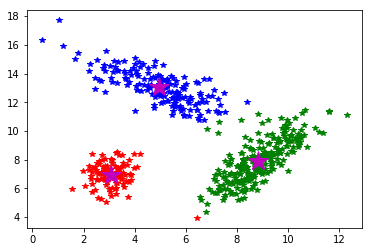

In [3]:
# generate 3 cluster data
m1, cov1 = [9, 8], [[1.5, 2], [1, 2]]
m2, cov2 = [5, 13], [[2.5, -1.5], [-1.5, 1.5]]
m3, cov3 = [3, 7], [[0.25, 0.5], [-0.1, 0.5]]

data1 = np.random.multivariate_normal(m1, cov1, 250)
data2 = np.random.multivariate_normal(m2, cov2, 180)
data3 = np.random.multivariate_normal(m3, cov3, 100)

X = np.vstack((data1,np.vstack((data2,data3))))
np.random.shuffle(X)

centroids, C = kMeans(X, K = 3)
show(X, C, centroids)